In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('MagicBricks.csv')

In [3]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
data.shape

(1259, 11)

In [5]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [6]:
data.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [7]:
data['Bathroom'].value_counts()

2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

In [8]:
data[data['Bathroom'].isna()]
data.dropna(subset=['Bathroom'],inplace=True)

In [9]:
data['Furnishing'].value_counts()

Semi-Furnished    708
Unfurnished       361
Furnished         183
Name: Furnishing, dtype: int64

In [10]:
data[data['Furnishing'].isna()]
data.dropna(subset=['Furnishing'],inplace=True)

In [11]:
data.isna().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       0
Locality         0
Parking         27
Price            0
Status           0
Transaction      0
Type             0
Per_Sqft       238
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(936, 11)

In [15]:
data.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

## outliers


E:\anacondanew\envs\house\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

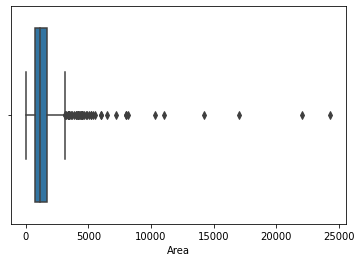

In [16]:
sns.boxplot(data['Area'])

<AxesSubplot:>

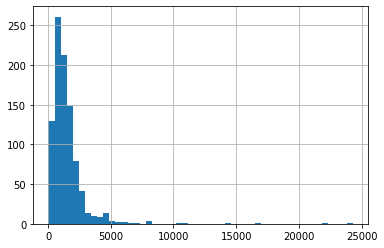

In [17]:
data.Area.hist(bins=50)

7.3275206512419375


E:\anacondanew\envs\house\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

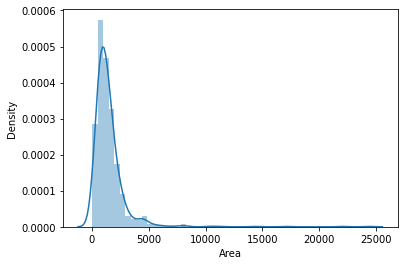

In [18]:
print(data['Area'].skew())
sns.distplot(data['Area'])

In [19]:
q3=data['Area'].quantile(0.75)
q1=data['Area'].quantile(0.25)
iqr=q3-q1
low=q1-(iqr*1.5)
up=q3+(iqr*1.5)
print(low),print(up)
index_area = data[(data['Area'] >= up)|(data['Area'] <= low)].index

-675.0
3125.0


In [20]:
data.drop(index_area, inplace=True)

0.6582205606465272


E:\anacondanew\envs\house\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

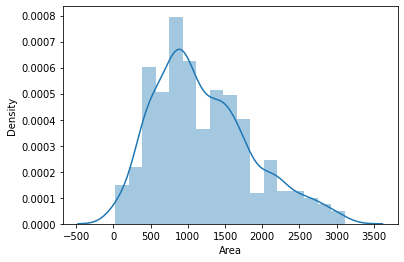

In [21]:
print(data['Area'].skew())
sns.distplot(data['Area'])

E:\anacondanew\envs\house\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Per_Sqft', ylabel='Density'>

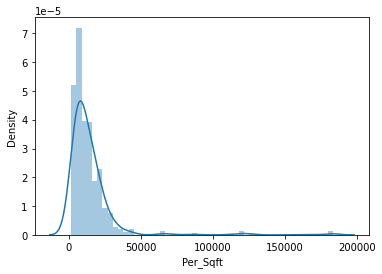

In [22]:
sns.distplot(data['Per_Sqft'])

In [23]:
q3=data['Per_Sqft'].quantile(0.75)
q1=data['Per_Sqft'].quantile(0.25)
iqr=q3-q1
low=q1-(iqr*1.5)
up=q3+(iqr*1.5)
print(low),print(up)
index_sqft = data[(data['Per_Sqft'] >= up)|(data['Per_Sqft'] <= low)].index

-10386.875
33722.125


In [24]:
data.drop(index_sqft,inplace=True)

0.6711951719561471


E:\anacondanew\envs\house\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Per_Sqft', ylabel='Density'>

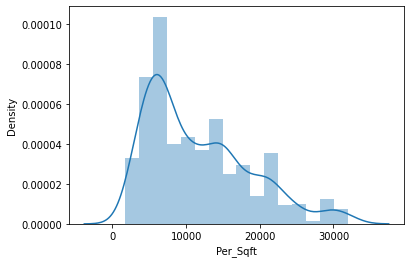

In [25]:
print(data['Area'].skew())
sns.distplot(data['Per_Sqft'])

In [26]:
data['BHK'].value_counts()

3    362
2    268
4    127
1     77
5      8
6      2
7      1
Name: BHK, dtype: int64

In [27]:
data.loc[data['BHK']>5,'BHK']=5

In [28]:
data['Bathroom'].value_counts()
data['Bathroom']=data['Bathroom'].astype(int)

In [29]:
data.loc[data['Bathroom']>5,'Bathroom']=5

In [30]:
data.drop(columns='Locality',inplace=True)

In [31]:
data['Parking'].value_counts()
data['Parking']=data['Parking'].astype(int)

In [32]:
data.loc[data['Parking']>4,'Parking']=4

In [33]:
data['Status'].value_counts()

Ready_to_move    802
Almost_ready      43
Name: Status, dtype: int64

In [34]:
data['Transaction'].value_counts()

Resale          527
New_Property    318
Name: Transaction, dtype: int64

In [35]:
data['Type'].value_counts()

Builder_Floor    463
Apartment        382
Name: Type, dtype: int64

In [36]:
data.loc[data['Furnishing']=='Unfurnished','Furnishing']=0
data.loc[data['Furnishing']=='Semi-Furnished','Furnishing']=1
data.loc[data['Furnishing']=='Furnished','Furnishing']=2
data.loc[data['Status']=='Ready_to_move','Status']=1
data.loc[data['Status']=='Almost_ready','Status']=0
data.loc[data['Transaction']=='New_Property','Transaction']=1
data.loc[data['Transaction']=='Resale','Transaction']=0
data.loc[data['Type']=='Apartment','Type']=0
data.loc[data['Type']=='Builder_Floor','Type']=1

In [37]:
data['Furnishing']=data['Furnishing'].astype(int)
data['Status']=data['Status'].astype(int)
data['Transaction']=data['Transaction'].astype(int)
data['Type']=data['Type'].astype(int)

In [38]:
from sklearn.preprocessing import normalize,StandardScaler,FunctionTransformer
transformer = FunctionTransformer(np.log1p)
ss=StandardScaler()
#we can use pipleline to scale and fit model 
#from sklearn.pipeline import make_pipeline

In [39]:
data['area']=ss.fit(np.array(data['Area']).reshape(-1,1))
data['Area']=ss.transform(np.array(data['Area']).reshape(-1,1))
data['Per_Sqft']=transformer.fit_transform(np.array(data['Per_Sqft']).reshape(-1,1))
#data['Per_Sqft']=normalize(np.array(data['Per_Sqft']).reshape(1,-1)).reshape(-1,1)

In [40]:
data.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft,area
1,-0.713487,2,2,1,1,5000000,1,1,0,8.805075,StandardScaler()
2,-0.403129,2,2,2,1,15500000,1,0,0,8.805075,StandardScaler()
3,-0.946254,2,2,1,1,4200000,1,0,1,8.805075,StandardScaler()
4,-0.868665,2,2,1,1,6200000,1,1,1,8.805075,StandardScaler()
5,0.139996,4,3,1,1,15500000,1,1,1,8.805075,StandardScaler()


In [41]:
data.corr()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
Area,1.000000,0.776866,0.820078,0.089268,0.290066,0.806599,-0.058406,0.086005,0.011636,0.364552
BHK,0.776866,1.000000,0.796445,0.145376,0.165509,0.628144,-0.048132,0.137602,0.109293,0.265116
Bathroom,0.820078,0.796445,1.000000,0.076735,0.270953,0.760685,-0.058961,0.160701,0.115030,0.340793
Furnishing,0.089268,0.145376,0.076735,1.000000,-0.030481,0.051214,0.002798,0.008744,0.017689,0.007005
Parking,0.290066,0.165509,0.270953,-0.030481,1.000000,0.350406,0.012605,0.024156,0.004906,0.259124
Price,0.806599,0.628144,0.760685,0.051214,0.350406,1.000000,-0.093211,0.167423,0.084844,0.511002
Status,-0.058406,-0.048132,-0.058961,0.002798,0.012605,-0.093211,1.000000,-0.209163,0.070987,-0.085613
Transaction,0.086005,0.137602,0.160701,0.008744,0.024156,0.167423,-0.209163,1.000000,0.229497,0.002132
Type,0.011636,0.109293,0.115030,0.017689,0.004906,0.084844,0.070987,0.229497,1.000000,0.051628
Per_Sqft,0.364552,0.265116,0.340793,0.007005,0.259124,0.511002,-0.085613,0.002132,0.051628,1.000000


<AxesSubplot:>

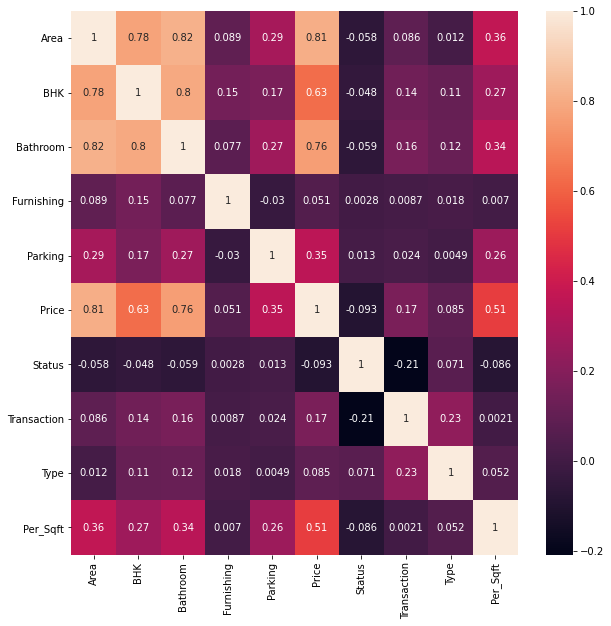

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [43]:
data.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft,area
1,-0.713487,2,2,1,1,5000000,1,1,0,8.805075,StandardScaler()
2,-0.403129,2,2,2,1,15500000,1,0,0,8.805075,StandardScaler()
3,-0.946254,2,2,1,1,4200000,1,0,1,8.805075,StandardScaler()
4,-0.868665,2,2,1,1,6200000,1,1,1,8.805075,StandardScaler()
5,0.139996,4,3,1,1,15500000,1,1,1,8.805075,StandardScaler()


In [44]:
# from scipy.stats import f_oneway
# f_oneway(np.array(data['Furnishing']),np.array(data['Type']))

In [45]:
# from scipy.stats import chi2_contingency
# chi2_contingency(np.array(data['Price']),np.array(data['Type']))

In [46]:
# from scipy.stats import chisquare
# chisquare(np.array(data['Furnishing']))

In [47]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

In [44]:
x=data[['Area','BHK','Furnishing','Parking','Transaction','Type','Per_Sqft']]
y=data['Price']

In [49]:
# X=data[['Furnishing','Parking','Transaction','Type']]
# chi2_features = SelectKBest(chi2, k = 4)
# X_kbest_features = chi2_features.fit_transform(X, y)

In [50]:
# chi2_features.scores_

array([116.99160895,  91.56153612, 193.94361263, 133.66505533])

In [45]:
x.head()

,Area,BHK,Furnishing,Parking,Transaction,Type,Per_Sqft
1,-0.713487,2,1,1,1,0,8.805075
2,-0.403129,2,2,1,0,0,8.805075
3,-0.946254,2,1,1,0,1,8.805075
4,-0.868665,2,1,1,1,1,8.805075
5,0.139996,4,1,1,1,1,8.805075


In [47]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse,r2_score,mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

In [56]:
x_train, X_test, y_train, y_test = tts(x,y, test_size=0.25, random_state=0)

In [55]:
# from sklearn.linear_model import LinearRegression
# le=LinearRegression()
# le.fit(x_train,y_train)
# y_pred=le.predict(X_test)
# r2_score(y_test,y_pred)

0.7430844709578461

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)

0.7585057044972687

In [65]:
# from sklearn.tree import DecisionTreeRegressor
# dt= DecisionTreeRegressor()
# dt.fit(x_train,y_train)
# y_pred=dt.predict(X_test)
# r2_score(y_test,y_pred)

0.41369752256029857

In [72]:
# from sklearn import tree
# dt= tree.DecisionTreeRegressor()
# dt.fit(x_train,y_train)
# plt.figure(figsize=(15,15))
# tree.plot_tree(dt) 

In [67]:
cross_val_score(rf,x,y,cv=5)

array([0.37305386, 0.75986052, 0.76408564, 0.59339159, 0.69951809])

In [58]:
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)

0.7585057044972687

In [51]:
# import xgboost as xg
# xgb_r = xg.XGBRegressor() 
# xgb_r.fit(x_train,y_train)  
# pred = xgb_r.predict(X_test) 
# rmse = np.sqrt(mse(y_test, pred))
# print("RMSE : % f" %(rmse))
# r2_score(y_test,pred)

E:\anacondanew\envs\house\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

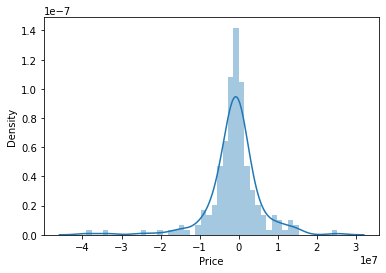

In [59]:
sns.distplot(y_test-y_pred)

In [60]:
print('MAE:', mae(y_test,y_pred))
print('MSE:', mse(y_test,y_pred))
print('RMSE:', np.sqrt(mse(y_test,y_pred)))

MAE: 4097892.099056604
MSE: 45421224120002.945
RMSE: 6739526.995272216


E:\anacondanew\envs\house\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

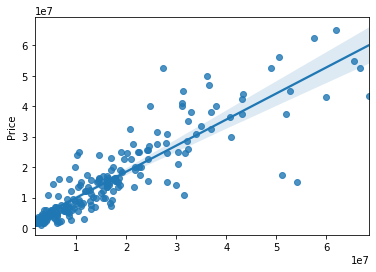

In [61]:
sns.regplot(y_pred,y_test)

E:\anacondanew\envs\house\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

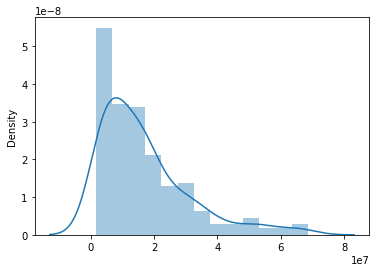

In [62]:
sns.distplot(y_pred)

In [61]:
# import pickle
# # open a file, where you ant to store the data
# filelast = open('housefinal.pkl', 'wb')

# # dump information to that file
# pickle.dump(le, filelast)
# pickle.dump(ss, filelast)
# filelast.close()

In [62]:
# from pickle import dump

In [63]:
# dump(le, open('le.pkl', 'wb'))
# # save the scaler
# dump(ss, open('ss.pkl', 'wb'))

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop =1000 , num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3,7, num = 1)]
# Minimum number of samples required to split a node
min_samples_split = [5,10,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,5]

In [76]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5,  random_state=42)

In [77]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [3],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error')

In [78]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 3}

In [79]:
prediction = rf_random.predict(X_test)

In [80]:
r2_score(y_test,prediction)

0.7838075104853269

In [86]:
# import pickle
# # open a file, where you ant to store the data
# filelast = open('housefinal.pkl', 'wb')

# # dump information to that file
# pickle.dump(le, filelast)
# pickle.dump(ss, filelast)
# filelast.close()

In [85]:
from pickle import dump
dump(rf_random, open('le.pkl', 'wb'))
# save the scaler
dump(ss, open('ss.pkl', 'wb'))